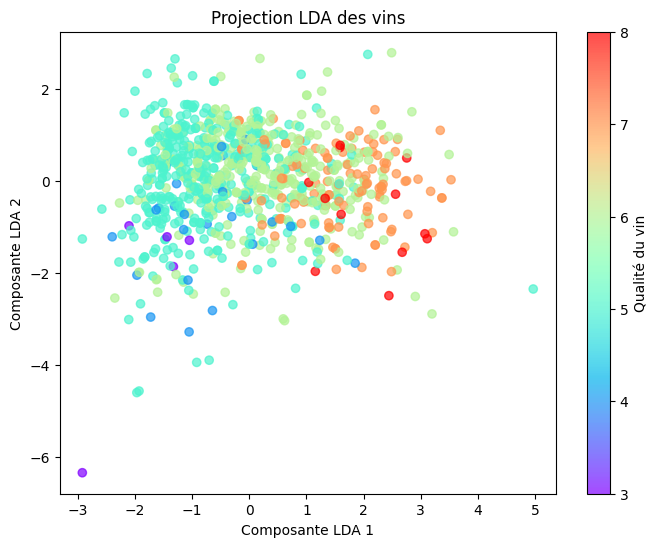

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.69      0.79      0.74        97
           6       0.59      0.63      0.61        92
           7       0.50      0.31      0.38        29
           8       0.00      0.00      0.00         3

    accuracy                           0.63       229
   macro avg       0.30      0.29      0.29       229
weighted avg       0.59      0.63      0.60       229



d:\ALYRA\WINE-AI\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\ALYRA\WINE-AI\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\ALYRA\WINE-AI\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv('WineQT.csv')  # adapte le chemin si besoin

# Séparer features et cible
X = df.drop('quality', axis=1)
y = df['quality']

# Optionnel : regrouper les classes si elles sont trop nombreuses
# Par exemple, regrouper les qualités <=5 en "faible", 6 en "moyenne", >=7 en "bonne"
# y = y.apply(lambda x: 'faible' if x <= 5 else ('moyenne' if x == 6 else 'bonne'))

# Séparer en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardiser les features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Appliquer LDA (n_components <= nombre de classes - 1)
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# Visualisation des données projetées
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_train_lda[:,0], X_train_lda[:,1], c=y_train, cmap='rainbow', alpha=0.7)
plt.xlabel('Composante LDA 1')
plt.ylabel('Composante LDA 2')
plt.title('Projection LDA des vins')
plt.colorbar(scatter, label='Qualité du vin')
plt.show()

# Évaluer la performance d'un modèle simple sur les nouvelles dimensions
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_lda, y_train)
y_pred = clf.predict(X_test_lda)
print(classification_report(y_test, y_pred))
